<a href="https://colab.research.google.com/github/Ratnesh1210/Car-details-price-prediction/blob/main/car_details_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Car Price Prediction Using Regression model

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Cntributor -** - Ratnesh Verma


# **Project Summary -**

This dataset comprises a wealth of information regarding used cars, including details such as the year in which the car was manufactured, the selling price, the amount of kilometers driven, the type of fuel used, the type of seller (whether a dealer or an individual), the type of transmission (automatic or manual), and the number of previous owners. 

the task at hand is to apply various machine learning regression models to the provided used car dataset, with the objective of accurately predicting the selling price of the cars based on the available features. This could involve using multiple linear regression, polynomial regression, decision tree regression, random forest regression, or other suitable regression models. The ultimate goal is to identify the model or combination of models that yields the most accurate and reliable price predictions for the used cars in the dataset.


# **GitHub Link -**

**Problem Statement**


the task at hand is to apply various machine learning regression models to the provided used car dataset, with the objective of accurately predicting the selling price of the cars based on the available features. This could involve using multiple linear regression, polynomial regression, decision tree regression, random forest regression, or other suitable regression models. The ultimate goal is to identify the model or combination of models that yields the most accurate and reliable price predictions for the used cars in the dataset.

# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')


In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
#Importing data set
df =pd.read_csv("/content/drive/MyDrive/CAR DETAILS (1).csv")

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 4340
The number of columns in data is 8


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# df.duplicated().sum()
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates rows in the data is:',duplicate_rows_in_store_data)

The number of duplicates rows in the data is: 763


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### What did you know about your dataset?

1. -There is no null value present in the data set.
2. -There are 8 columns in the dataset.
3. -The number of duplicate row in the dataset is 763. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(df.columns))

['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [ ]:
# checking information about the data type of the variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# Dataset Describe
df.describe()


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Check Unique Values for each variable.

In [ ]:
#checking number of unique cars available in the data set
df['name'].nunique()

1491

In [ ]:
# Check Unique Values for each variable.

for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in name are ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
The unique values in year are [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
The unique values in selling_price are [  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  1750

## ***3.Data Wrangling and visualization***

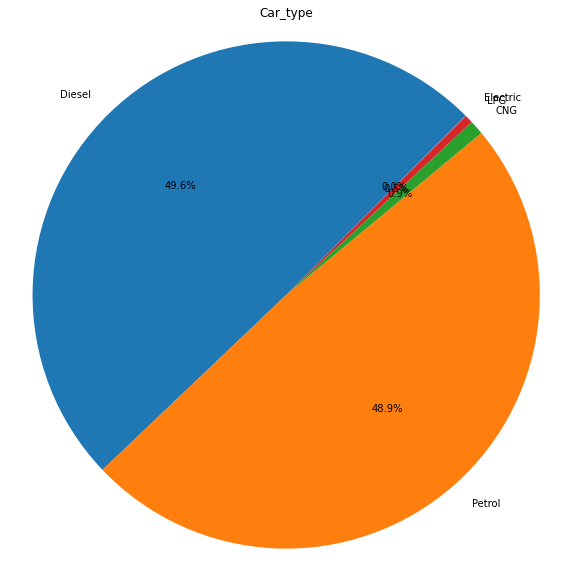

In [ ]:
# Get the counts of each category in the column
counts = df['fuel'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%' , startangle=45 , textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Car_type')
plt.show()

In [ ]:
unique_car = df["name"].nunique()
print("The number of unique car count variables is:", unique_car)

The number of unique car count variables is: 1491


In [ ]:
car_owner = df.groupby("owner")["name"].count().reset_index().rename(columns={"name": "count"})
car_owner


,owner,count
0,First Owner,2832
1,Fourth & Above Owner,81
2,Second Owner,1106
3,Test Drive Car,17
4,Third Owner,304


<Axes: title={'center': 'car_owner Type'}, xlabel='owner', ylabel='count'>

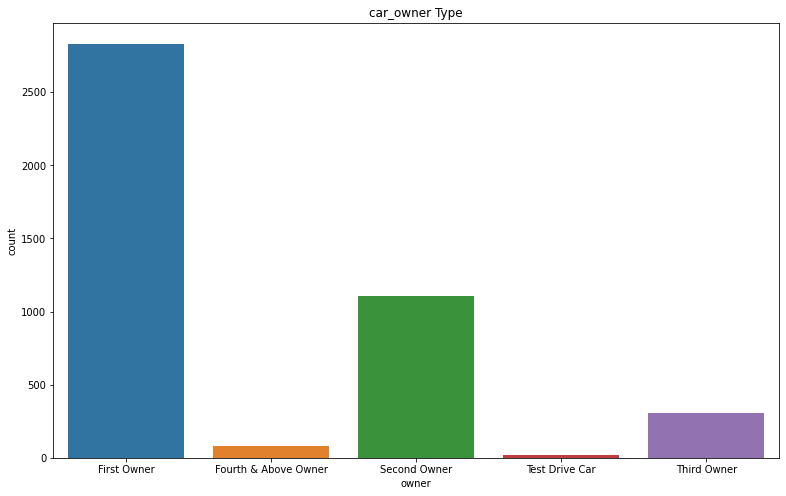

In [ ]:
plt.figure(figsize=(13,8))
plt.title('car_owner Type')
sns.barplot(x='owner',y='count',data=car_owner)

In [ ]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [ ]:
selling_price = df.groupby("fuel")["selling_price"].sum().reset_index()
selling_price

,fuel,selling_price
0,CNG,11086997
1,Diesel,1440559925
2,Electric,310000
3,LPG,3859999
4,Petrol,732095612


<Axes: title={'center': 'max_sell_CAR_Type'}, xlabel='fuel', ylabel='selling_price'>

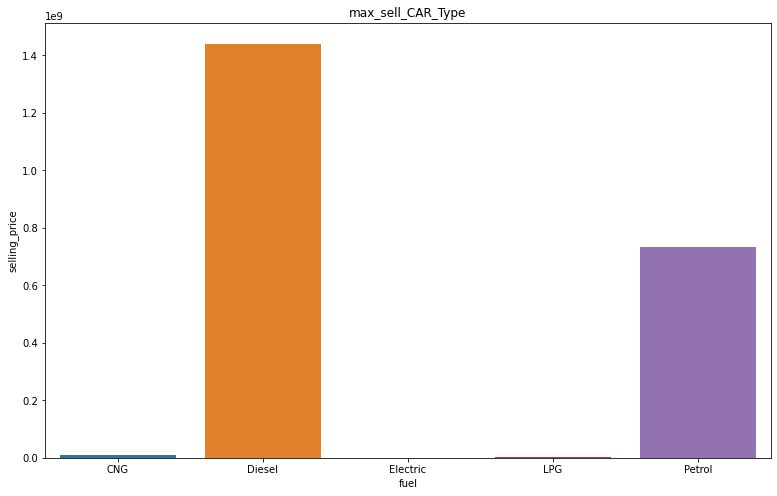

In [ ]:
plt.figure(figsize=(13,8))
plt.title('max_sell_CAR_Type')
sns.barplot(x='fuel',y='selling_price',data=selling_price)

owner        selling_price
First Owner  300000           114
             550000            87
             600000            84
Name: selling_price, dtype: int64
owner         selling_price
Second Owner  150000           43
              300000           42
              450000           41
Name: selling_price, dtype: int64
owner                 selling_price
Fourth & Above Owner  110000           7
                      70000            6
                      250000           6
Name: selling_price, dtype: int64
owner        selling_price
Third Owner  150000           14
             120000           11
             110000            9
Name: selling_price, dtype: int64
owner           selling_price
Test Drive Car  541000           1
                635000           1
                700000           1
Name: selling_price, dtype: int64


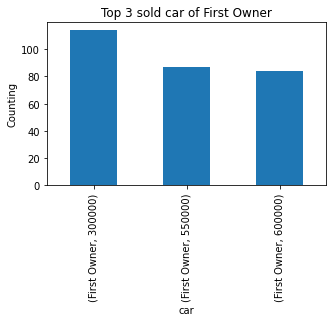

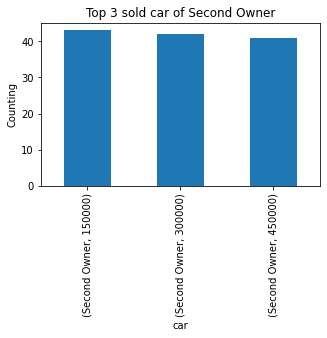

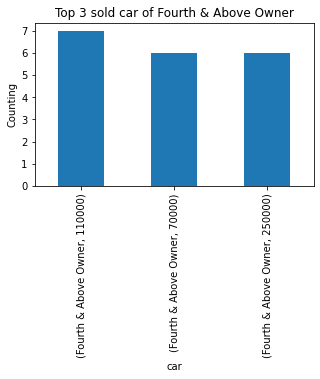

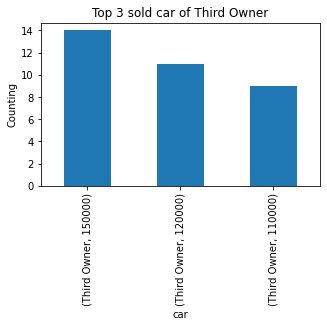

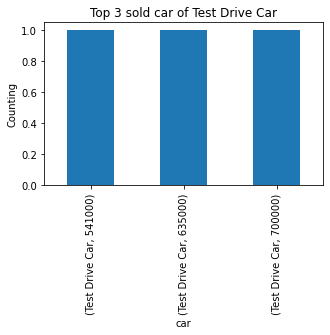

In [ ]:
# Chart - 4 visualization code
newlist=df['owner'].unique()
y=list(newlist)
# Applying for loop operation
for x in y:
  sub_1=df.loc[df['owner'] == x]
  p_sub1=sub_1.groupby(['owner'])['selling_price'].value_counts().head(3)
  print(p_sub1)
  plt.figure(figsize=(5,3))
  p_sub1.plot(kind='bar')
  plt.title('Top 3 sold car of '+str(x))
  plt.xlabel("car")
  plt.ylabel("Counting")

In [ ]:
df_plot = df.groupby(['seller_type'])['name'].count().reset_index().rename(columns={"name": "count"})

df_plot

,seller_type,count
0,Dealer,994
1,Individual,3244
2,Trustmark Dealer,102


<Axes: xlabel='km_driven', ylabel='selling_price'>

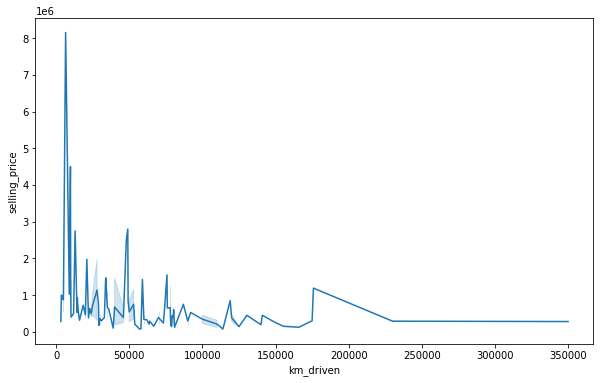

In [ ]:
#visualization code
#Writing a code for plotting line plot between the target variable and age, cigsPerDay, and heartRate
plt.figure(figsize=(10, 6))
sns.lineplot(x='km_driven', y="selling_price", data=df.head(200))


In [ ]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


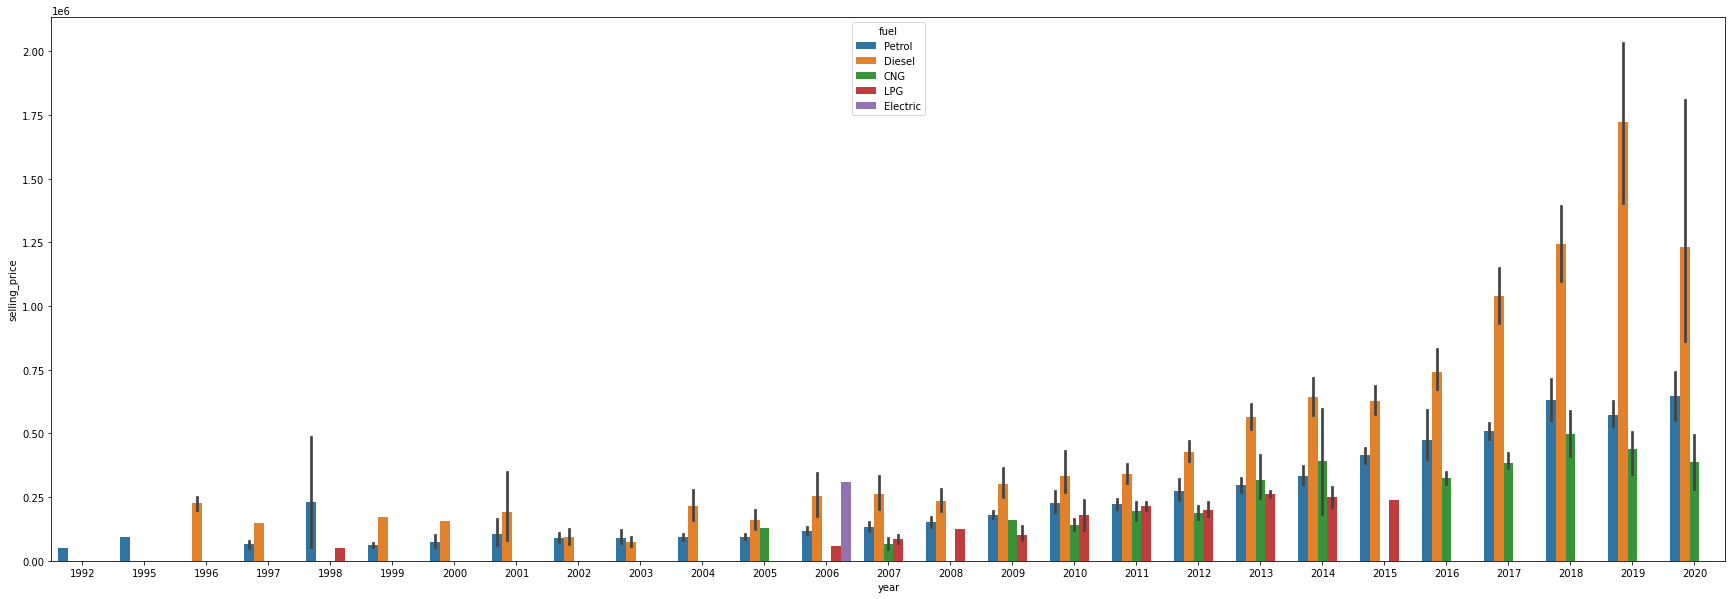

In [ ]:
#Here we can see that on an average selling price of each fuel type car in each year 
# Chart - 9 visualization code
plt.figure(figsize=(30,10))
ax=sns.barplot(x=df['year'], y=df['selling_price'],hue=df['fuel'])
plt.show()

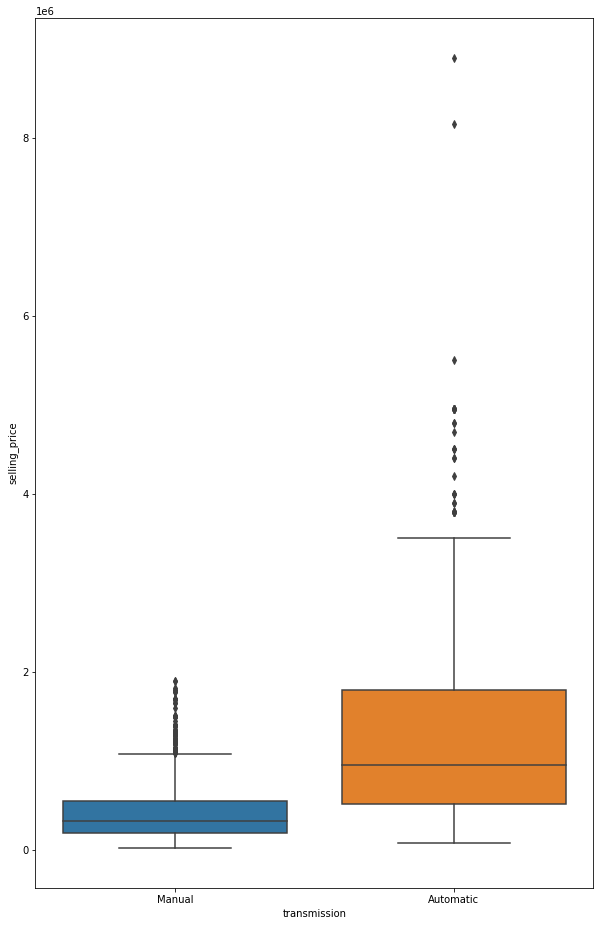

In [ ]:
#Lets check the selling price of manual and automatic cars
plt.figure(figsize=(10,16))
ax=sns.boxplot(x=df['transmission'], y=df['selling_price'])
plt.show()

## ***4. Feature Engineering & Data Pre-processing***


In [ ]:
df1 = df [['year', 'selling_price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner']]

In [ ]:
df1['Current_Year'] = 2022

In [ ]:
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022


In [ ]:
#Creating our new column no_of_year
df1['Year_old'] = df1['Current_Year'] - df1['year']

In [ ]:
#One Hot Encoding for Categorical variables by creating dummy variables
df1 = pd.get_dummies(df1, drop_first = True)

In [ ]:
df1.drop(['year','Current_Year'], axis=1, inplace=True)

In [ ]:
df1.head()

,selling_price,km_driven,Year_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


### 2. Handling Outliers

<Axes: ylabel='Density'>

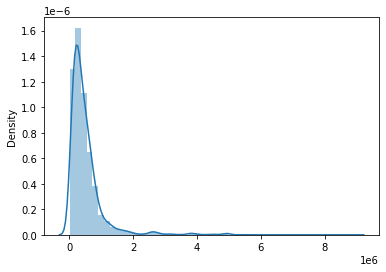

In [ ]:
#plotting distribution plot of target Variables
sns.distplot(x=df1.selling_price)

<Axes: ylabel='Density'>

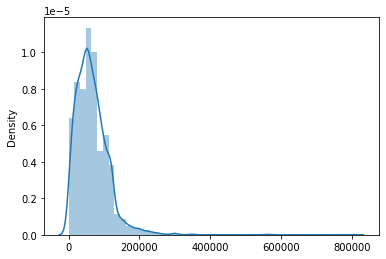

In [ ]:
#plotting distribution plot of target Variables
sns.distplot(x=df1.km_driven)

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables i.e. data distribution of a variable against the density distribution. In above graph we can see that our graph have right tail(right skewed) it means tha our most of data centered near peak of the graph but there is a some highly expensive price that leads to a seperate trends that's why our graph showing right trends.

In [ ]:

# calculate the upper and lower limits for the km_driven column using the capping method
Q1 = df1["km_driven"].quantile(0.25)
Q3 = df1["km_driven"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

# replace outliers above the upper limit with the nearest non-outlier value, and outliers below the lower limit with the nearest non-outlier value
df1["km_driven"] = np.where(df1["km_driven"] > upper_limit, df1["km_driven"].quantile(0.95), df1["km_driven"])
df1["km_driven"] = np.where(df1["km_driven"] < lower_limit, df1["km_driven"].quantile(0.05), df1["km_driven"])


In above, the upper and lower limits are calculated using the interquartile range (IQR) multiplied by 1.5. Any values above the upper limit or below the lower limit are replaced with the 99th or 1st percentile value, respectively, using the NumPy where function

<Axes: ylabel='Density'>

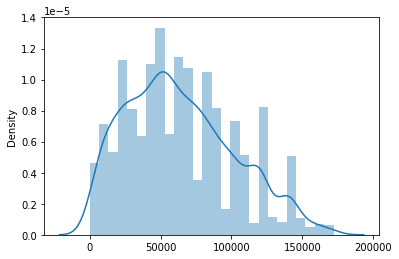

In [ ]:
sns.distplot(x=df1.km_driven)

In [ ]:
df1["km_driven_sqrt"] = np.sqrt(df1["km_driven"])

<Axes: ylabel='Density'>

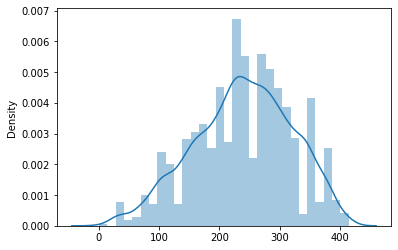

In [ ]:
sns.distplot(x=df1.km_driven_sqrt)

After transforming the data now we can see that our data looks good and Logarithmic transformation converted our data to a normal distribution. It is a type of data transformation that can be applied to data that has a wide range of values or is skewed in one direction.

In [ ]:
# take the natural logarithm of a column called "column_to_transform"
df1["selling_price"] = np.log(df1["selling_price"])

<Axes: ylabel='Density'>

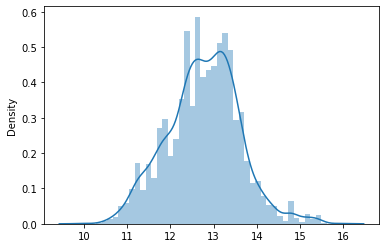

In [ ]:
#plotting distribution plot of target Variables
sns.distplot(x=df1.selling_price)

Logarithmic transformation is a mathematical operation used in data analysis and modeling to convert data that is not normally distributed to a normal distribution. It is a type of data transformation that can be applied to data that has a wide range of values or is skewed in one direction.

In [ ]:
df1.head()

,selling_price,km_driven,Year_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,km_driven_sqrt
0,11.002100,70000.0,15,0,0,0,1,1,0,1,0,0,0,0,264.575131
1,11.813030,50000.0,15,0,0,0,1,1,0,1,0,0,0,0,223.606798
2,13.304685,100000.0,10,1,0,0,0,1,0,1,0,0,0,0,316.227766
3,12.429216,46000.0,5,0,0,0,1,1,0,1,0,0,0,0,214.476106
4,13.017003,141000.0,8,1,0,0,0,1,0,1,0,1,0,0,375.499667


In [ ]:
#dropping un_necessary colmns
df1.drop(['km_driven'], axis=1, inplace=True)

In [ ]:
df1.columns

Index(['selling_price', 'Year_old', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'km_driven_sqrt'],
      dtype='object')

#### 2. Feature Selection

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# define your feature matrix X and target variable y
X = df1.drop('selling_price', axis=1)
y = df1['selling_price']

# train a Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X, y)

# get feature importances and put them into a DataFrame
importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the DataFrame by importance (descending)
importances = importances.sort_values('importance', ascending=False)

# print the top 10 features by importance
print(importances.head(16))


                         feature  importance
0                       Year_old    0.555276
12                km_driven_sqrt    0.164757
7            transmission_Manual    0.127230
1                    fuel_Diesel    0.075854
5         seller_type_Individual    0.020050
4                    fuel_Petrol    0.018765
9             owner_Second Owner    0.017929
11             owner_Third Owner    0.010055
6   seller_type_Trustmark Dealer    0.005146
8     owner_Fourth & Above Owner    0.004249
3                       fuel_LPG    0.000439
10          owner_Test Drive Car    0.000236
2                  fuel_Electric    0.000014


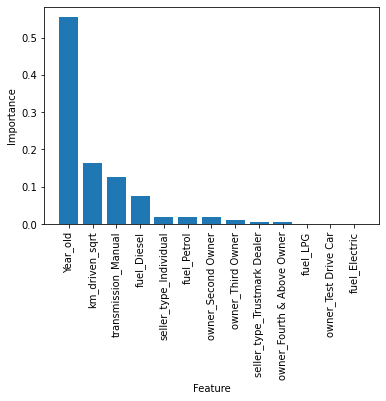

In [ ]:
import matplotlib.pyplot as plt

# create a bar chart of feature importances
plt.bar(importances['feature'], importances['importance'])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [ ]:
#removing un-necessary features
df1.drop(['fuel_LPG', 'owner_Test Drive Car','fuel_Electric' ], axis=1, inplace=True)

In [ ]:
df1.columns

Index(['selling_price', 'Year_old', 'fuel_Diesel', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Third Owner', 'km_driven_sqrt'],
      dtype='object')

### 6. Data Scaling

StandardScaler is a popular method for scaling numerical data, typically used in machine learning and data analysis. It transforms your data so that it has a mean of 0 and a standard deviation of 1.

StandardScaler is a commonly used scaling method that scales the data to have zero mean and unit variance. This ensures that the features are on the same scale and have similar ranges. Scaling is generally considered a good practice in machine learning and data analysis, and is often a necessary step in the preprocessing pipeline

In [ ]:
#making copy
df2=df1.copy()

In [ ]:
#importing libraray
from sklearn.preprocessing import StandardScaler

In [ ]:
#convering data type
df2['Year_old'] = df2['Year_old'].astype(float)

In [ ]:
# Scaling your data
#applying standardScaler 
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)

In [ ]:
#converting back to dataframe
df3 = pd.DataFrame(df3, columns=df2.columns)

In [ ]:
df3.head()

,selling_price,Year_old,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,km_driven_sqrt
0,-2.099798,1.445074,-0.992196,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.274449,0.310349
1,-1.133448,1.445074,-0.992196,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.274449,-0.196963
2,0.644091,0.258795,1.007865,-0.978571,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.274449,0.949966
3,-0.399167,-0.927485,-0.992196,1.021899,0.581253,-0.155139,0.339276,-0.137908,-0.584800,-0.274449,-0.310029
4,0.301273,-0.215717,1.007865,-0.978571,0.581253,-0.155139,0.339276,-0.137908,1.709986,-0.274449,1.683932


### 8. Data Splitting

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x, y = df3.loc[:, df3.columns != 'selling_price'], df3['selling_price']

In [ ]:
#importing library to split
from sklearn.model_selection import train_test_split
#dividing the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(3472, 10)
(868, 10)


## ***5. ML Model Implementation***

In [ ]:
# create a dataframe to store metrics related to models
metrics_table = pd.DataFrame(columns=['Regression_Model', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE', 'Train_RMSPE', 'Test_RMSPE'])

In [ ]:
# define a function to calculate root mean squared percentage error
# returns an array
def calculate_rmspe(y, y_pred):
  return (np.sqrt(np.mean(np.square(y.to_numpy() - y_pred))) / np.mean(y.to_numpy())) * 100

In [ ]:
# define a function to calculate metrics
# returns a dictionary
def calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred):
  metrics_dict = {}

  metrics_dict['Train_R2'] = r2_score(y_train, y_train_pred)
  metrics_dict['Test_R2'] = r2_score(y_test, y_test_pred)
  metrics_dict['Train_RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
  metrics_dict['Test_RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)
  metrics_dict['Train_RMSPE'] = calculate_rmspe(y_train, y_train_pred)
  metrics_dict['Test_RMSPE'] = calculate_rmspe(y_test, y_test_pred)

  return metrics_dict

### ML Model - 1 Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
# Predict on the model

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)


LinearRegression()

In [ ]:
regression_model.score(x_test, y_test)

0.6906268884194776

In [ ]:
#checking prediction
y_train_pred = regression_model.predict(x_train)
y_test_pred = regression_model.predict(x_test)

In [ ]:
#calculating for model metrics
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
#storing data in metric tables
metrics_table.loc[len(metrics_table.index)] = ['Linear', model_evaluation['Train_R2'], model_evaluation['Test_R2'], 
                                                         model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'], 
                                                         model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We have used Linear Regression as our first model, Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [ ]:
metrics_table

,Regression_Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_RMSPE,Test_RMSPE
0,Linear,0.685865,0.690627,0.557798,0.566387,-7078.509734,1796.87532


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model

# cross validation using k fold technique
from sklearn.model_selection import cross_val_score
for i in [3,5,10]:
  score = cross_val_score(LinearRegression(), x_train, y_train,cv=i)
  print(np.average(score))


0.6825852038525492
0.6827589422140068
0.6818860910800402


In [ ]:
#hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

lr = LinearRegression()

param_distributions = {"fit_intercept": [True, False],
                        "copy_X": [True, False],
                       "positive": [True, False]}
search = RandomizedSearchCV(lr, param_distributions).fit(x, y)
search.best_score_ 

0.6828918378093063

In [ ]:
c=search.best_params_

In [ ]:
# Fit the model on the entire training data using best hyperparameters
lr = LinearRegression(fit_intercept=c["fit_intercept"], copy_X=c["copy_X"], positive=c["positive"])
lr.fit(x_train, y_train)

# Predict the target variable for test data using the trained model
y_pred = lr.predict(x_test)

# Evaluate the model performance on test data
from sklearn.metrics import r2_score, mean_squared_error

print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R^2 score: 0.6907201273263639
MSE: 0.32069706333438897


##### Which hyperparameter optimization technique have you used and why?

Over here we have used **RandomizedSearchCV** hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, Random Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen slight fall in the accuracy of the model by using the hyperparameter tuning. 

###ML Model - 2 Decision Tree Regressor


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
decision_tree_model.score(x_test, y_test)

0.6370993065019193

In [ ]:
# predict the train and test data
y_train_pred = decision_tree_model.predict(x_train)
y_test_pred = decision_tree_model.predict(x_test)

In [ ]:
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

metrics_table.loc[len(metrics_table.index)] = ['Decision Tree', model_evaluation['Train_R2'], model_evaluation['Test_R2'], 
                                                         model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'], 
                                                         model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

Over here we have used Decision tree regressor, Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [ ]:
metrics_table.loc[1:,:]

,Regression_Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_RMSPE,Test_RMSPE
1,Decision Tree,0.916867,0.637099,0.28695,0.613431,-3641.420003,1946.124231


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from pylab import rcParams


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
# cross validation using k fold technique
from sklearn.model_selection import cross_val_score
for i in [3,5,10]:
  score = cross_val_score(DecisionTreeRegressor(), X, y,cv=i)
  print(np.mean(score))

0.5695686272038029
0.5812858523648151
0.5907460461962424


In [ ]:
#hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

dtr = DecisionTreeRegressor()

param_distributions = {"criterion": ["squared_error", "poisson","friedman_mse" ],
                        "splitter": ["best", "random"],
                       "max_features": ["auto", "sqrt", "log2"], "max_depth" : [10]}
search = RandomizedSearchCV(dtr, param_distributions).fit(X, y)
search.best_score_ 

0.648436842194774

In [ ]:
search.best_params_

{'splitter': 'best',
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'squared_error'}

##### Which hyperparameter optimization technique have you used and why?

Over here we have used RandomizedSearchCV hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, Random Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen slight fall in the accuracy of the model by using the hyperparameter tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metrics are used in machine learning to measure the performance of a model on a given dataset. This allows us to compare the performance of different models and select the one that performs the best on the task at hand. we have used evaluation metrics for this tasks, mean squared error for regression problems , RMSE.

###ML Model - 3 Random Forest Regressor

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
random_forest_model.score(x_test, y_test)

0.7193488938109662

In [ ]:
# predict the train and test data
y_train_pred = random_forest_model.predict(x_train)
y_test_pred = random_forest_model.predict(x_test)

In [ ]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Random Forest', model_evaluation['Train_R2'], model_evaluation['Test_R2'], 
                                                                model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'], 
                                                                model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

A supervised learning technique called Random Forest Regression leverages the ensemble learning approach for regression. The ensemble learning method combines predictions from various machine learning algorithms to provide predictions that are more accurate than those from a single model.

### ML Model - 4 Lasso and Ridge Regression (L1 and L2 Regularization)

In [ ]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [ ]:
lasso_model.score(x_test, y_test)

-0.00149715478931145

In [ ]:
#ridge REgression
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
ridge_model.score(x_test, y_test)

0.6906297650071092

In [ ]:
# predict the train and test data
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)

In [ ]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Ridge', model_evaluation['Train_R2'], model_evaluation['Test_R2'], 
                                                                model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'], 
                                                                model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

In [ ]:
#elasticnet regression
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train, y_train)
elasticnet_model.score(x_test, y_test)

0.1577893849036287

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrics are used in machine learning to measure the performance of a model on a given dataset. This allows us to compare the performance of different models and select the one that performs the best on the task at hand. we have used evaluation metrics for this tasks, mean squared error for regression problems , RMSE.

In [ ]:
metrics_table.loc[3:,:]

,Regression_Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_RMSPE,Test_RMSPE
3,Ridge,0.685865,0.69063,0.557798,0.566384,-7078.512679,1796.866966


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)
# Predict on the model
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.31423038494557215


In [ ]:
# predict the train and test data
y_train_pred = lasso_regressor.predict(x_train)
y_test_pred = lasso_regressor.predict(x_test)

In [ ]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)
# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Lasso', model_evaluation['Train_R2'], model_evaluation['Test_R2'], 
                                                        model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE'], 
                                                        model_evaluation['Train_RMSPE'], model_evaluation['Test_RMSPE']]

##### Which hyperparameter optimization technique have you used and why?

Over here we have used GridSearchCV hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, grid Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen highly jump in the accuracy of the model by using the hyperparameter tuning our lasso r2 score increase to .82

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation metrics are used in machine learning to measure the performance of a model on a given dataset. This allows us to compare the performance of different models and select the one that performs the best on the task at hand. we have used evaluation metrics for this tasks, mean squared error for regression problems , RMSE.Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As we have seen above that, Random Forest Regressor is performing the best with the accuracy of 97.3% followed by Decison Tree Regressor with accuracy of 94.3%
so here we are choosing Random Forest Regressor for best prediction.

In [ ]:
# print metrics table
metrics_table

,Regression_Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_RMSPE,Test_RMSPE
0,Linear,0.685865,0.690627,0.557798,0.566387,-7078.509734,1796.875320
1,Decision Tree,0.916867,0.637099,0.286950,0.613431,-3641.420003,1946.124231
2,Random Forest,0.892611,0.719349,0.326136,0.539455,-4138.695433,1711.433545
3,Ridge,0.685865,0.690630,0.557798,0.566384,-7078.512679,1796.866966
4,Lasso,0.685865,0.690627,0.557798,0.566387,-7078.509734,1796.875320


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest is a supervised learning algorithm that can be used for both classification and regression tasks. A Random Forest regressor is a specific type of Random Forest that is used for regression tasks, which involve predicting a continuous output value (such as a price or temperature) rather than a discrete class label.

The algorithm works by creating an ensemble of decision trees, where each tree is trained on a random subset of the data. The final output is then obtained by averaging the predictions of all the trees. This helps to reduce overfitting and improve the overall performance of the model.

Random Forest regressor is known to be a very powerful algorithm that can handle high-dimensional data and a large number of input features. It is also relatively easy to use and interpret. It has several parameters that can be adjusted to optimize its performance, such as the number of trees in the ensemble, the maximum depth of each tree, and the minimum number of samples required to split a node.


### Here we are taking randomly 20 datapoints and predicting their price by the trained best model.

In [ ]:
#Here we are randomly taking 20 data points
sample_df = df3.sample(n=20)


In [ ]:
# Here we are creating the target and feature variable
X, Y = sample_df.loc[:, sample_df.columns != 'selling_price'], sample_df['selling_price']

In [ ]:
#predicted value
predict_20 = random_forest_model.predict(X)
predict_20

array([ 1.47461074, -0.34190446, -1.84460574,  1.00563543,  0.46356137,
        0.85688084, -0.22737172,  1.56546661,  0.67488473,  0.17217485,
       -0.75285343, -0.66499499,  1.56546661,  0.77989258,  0.29569111,
       -0.51818746, -0.87736549,  0.80355657, -0.97719203, -0.25505097])

In [ ]:
# Actual value
Y

852     1.470083
2713   -0.352429
2218   -1.916103
2932    0.885926
52      0.426826
800     0.910001
1270   -0.142828
911     1.565467
3859    0.692736
3988    1.179085
4207   -0.858743
3037   -0.399167
585     1.565467
4179    1.059152
3780    0.827785
464    -0.524720
140    -1.273805
4242    0.801972
2021   -0.968821
261    -0.181902
Name: selling_price, dtype: float64

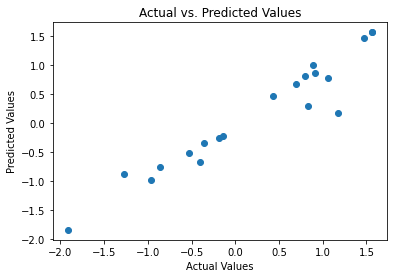

In [ ]:
#plot the actual and predicted value
plt.scatter(Y, predict_20)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
#finding the r2 score
random_forest_model.score(X,Y)

0.9158867903858251

In [ ]:
metrics_table.loc[2:,:]

,Regression_Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_RMSPE,Test_RMSPE
2,Random Forest,0.892611,0.719349,0.326136,0.539455,-4138.695433,1711.433545
3,Ridge,0.685865,0.690630,0.557798,0.566384,-7078.512679,1796.866966
4,Lasso,0.685865,0.690627,0.557798,0.566387,-7078.509734,1796.875320


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Text(0.5, 0, 'Relative Importance')

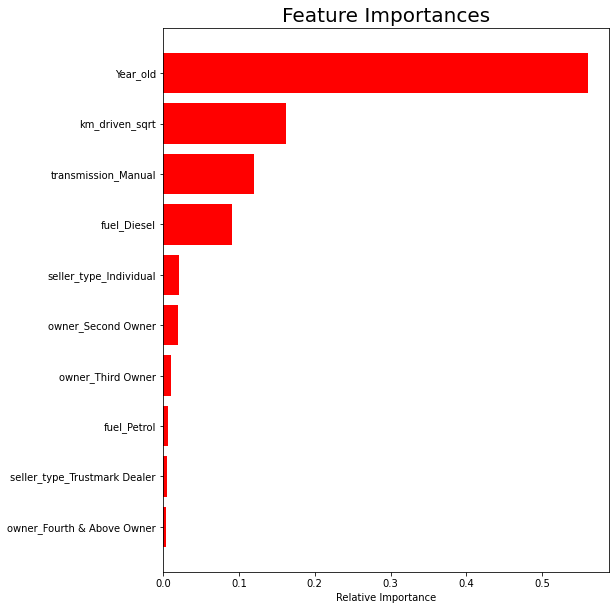

In [ ]:
features = X.columns
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## ***6. Conclusion***



*   Before creating the regression model, it is crucial to clean and pre-process the data so
 that it is in the right format.
*   Unnecessary data that skew the results were also filtered out.


*   Feature engineering and exploratory data analysis were performed to gather more meaningful information from the data.
*   Apart from this, various data visualization, like box plot, frequency plot, histogram, pair plot, correlation matrix and scatter plot were created to understand the uni-variate distribution and multi-variate relationship of the data


*   Majority of cars are Diesel (49.6%) and Petrol (48.9%)
*   The number of unique car count is: 1491
*   Maximum sold cars belongs to First owners.
*   selling price of cars is decreasing as per their running status.
*   we performed Regression Analysis on our data set to model the prices of cars
 
**ML model**



*   Among the all regression models, it is clear that Random Forest Regressor is giving the best result with the accuracy of 72.4% followed by linear Regressor with accuracy of 69.2%. So, we will use the random forest regressor to predict the sales.








### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***